Importiing library needed to our work.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'


import scipy.stats
from scipy.stats import norm
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
roc_curve, auc, roc_auc_score, precision_recall_fscore_support, \
precision_score, recall_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_biclusters
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV






Reading our data set

In [2]:
HD = pd.read_csv('data_set/heart.csv')


# Observing and Data Cleaning 

In [3]:
HD.shape
print('There are %i rows and %i columns in Heart Disease data set' % HD.shape) 

There are 303 rows and 14 columns in Heart Disease data set


In [4]:
print('Now we will go through the data for cleaning')
HD.info()

Now we will go through the data for cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
HD.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Data Dictionary

`age`: age in years

`sex`: (1 = male; 0 = female)

`cp`: chest pain type 
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

`trestbps`: resting blood pressure (in mm Hg on admission to the hospital)

`thalach`: maximum heart rate achieved

`chol`: serum cholestoral in mg/dl

`fbs`: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

`restecg`: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

`thalach`: maximum heart rate achieved

`exang`: exercise induced angina (1 = yes; 0 = no)

`oldpeak` = ST depression induced by exercise relative to rest

`slope`: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping

`ca`: number of major vessels (0-3) colored by flourosopy

`thal(thalassemia)`: blood disorder related to abnormal or inadequate amounts of hemoglobin

- 0 maps to null in the original dataset
- 1 maps to 6 in the original dataset. This means that a fixed defect was found.
- 2 maps to 3 in the original dataset. This means that the blood flow was normal.
- 3 maps to 7 in the original dataset. This means that a reversible defect

`target`: Heart disease (0 = no, 1 = yes)




In [6]:
# Rename coulmun to be more clear
HD.columns=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']

1- Check how many missing value we have to clean it.

In [7]:
HD.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
number_major_vessels       0
thalassemia                0
target                     0
dtype: int64

We have no missing value but we should check if the data match the description 

In [8]:
HD.describe().T

count        mean        std    min    25%    50%  \
age                      303.0   54.366337   9.082101   29.0   47.5   55.0   
sex                      303.0    0.683168   0.466011    0.0    0.0    1.0   
chest_pain_type          303.0    0.966997   1.032052    0.0    0.0    1.0   
resting_blood_pressure   303.0  131.623762  17.538143   94.0  120.0  130.0   
cholesterol              303.0  246.264026  51.830751  126.0  211.0  240.0   
fasting_blood_sugar      303.0    0.148515   0.356198    0.0    0.0    0.0   
rest_ecg                 303.0    0.528053   0.525860    0.0    0.0    1.0   
max_heart_rate_achieved  303.0  149.646865  22.905161   71.0  133.5  153.0   
exercise_induced_angina  303.0    0.326733   0.469794    0.0    0.0    0.0   
st_depression            303.0    1.039604   1.161075    0.0    0.0    0.8   
st_slope                 303.0    1.399340   0.616226    0.0    1.0    1.0   
number_major_vessels     303.0    0.729373   1.022606    0.0    0.0    0.0   
thalassemia              303.0    2.313531   0.612277    0.0    2.0    2.0   
target                   303.0    0.544554   0.498835    0.0    0.0    1.0   

                           75%    max  
age                       61.0   77.0  
sex                        1.0    1.0  
chest_pain_type            2.0    3.0  
resting_blood_pressure   140.0  200.0  
cholesterol              274.5  564.0  
fasting_blood_sugar        0.0    1.0  
rest_ecg                   1.0    2.0  
max_heart_rate_achieved  166.0  202.0  
exercise_induced_angina    1.0    1.0  
st_depression              1.6    6.2  
st_slope                   2.0    2.0  
number_major_vessels       1.0    4.0  
thalassemia                3.0    3.0  
target                     1.0    1.0

As its clear from the describe all the data met the  data description exept for number_major_vessels and thalassemia.

For number_major_vessels number of major vessels (0-3) but we have 5 rows with number of vessels =4 then its not clean and we will remove it

In [9]:
#not included(not clean)
HD[HD.number_major_vessels==4]

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
92    52    1                2                     138          223   
158   58    1                1                     125          220   
163   38    1                2                     138          175   
164   38    1                2                     138          175   
251   43    1                0                     132          247   

     fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
92                     0         1                      169   
158                    0         1                      144   
163                    0         1                      173   
164                    0         1                      173   
251                    1         0                      143   

     exercise_induced_angina  st_depression  st_slope  number_major_vessels  \
92                         0            0.0         2                     4   
158                        0            0.4         1                     4   
163                        0            0.0         2                     4   
164                        0            0.0         2                     4   
251                        1            0.1         1                     4   

     thalassemia  target  
92             2       1  
158            3       1  
163            2       1  
164            2       1  
251            3       0

In [10]:
HD = HD[HD.number_major_vessels != 4]
HD.describe().T


count        mean        std    min    25%    50%  \
age                      298.0   54.510067   9.030526   29.0   48.0   56.0   
sex                      298.0    0.677852   0.468085    0.0    0.0    1.0   
chest_pain_type          298.0    0.959732   1.033963    0.0    0.0    1.0   
resting_blood_pressure   298.0  131.580537  17.669293   94.0  120.0  130.0   
cholesterol              298.0  246.906040  51.893097  126.0  211.0  241.5   
fasting_blood_sugar      298.0    0.147651   0.355350    0.0    0.0    0.0   
rest_ecg                 298.0    0.523490   0.526521    0.0    0.0    1.0   
max_heart_rate_achieved  298.0  149.466443  22.983830   71.0  133.0  152.5   
exercise_induced_angina  298.0    0.328859   0.470589    0.0    0.0    0.0   
st_depression            298.0    1.055369   1.164162    0.0    0.0    0.8   
st_slope                 298.0    1.395973   0.617574    0.0    1.0    1.0   
number_major_vessels     298.0    0.674497   0.938202    0.0    0.0    0.0   
thalassemia              298.0    2.312081   0.614024    0.0    2.0    2.0   
target                   298.0    0.540268   0.499214    0.0    0.0    1.0   

                            75%    max  
age                       61.00   77.0  
sex                        1.00    1.0  
chest_pain_type            2.00    3.0  
resting_blood_pressure   140.00  200.0  
cholesterol              275.00  564.0  
fasting_blood_sugar        0.00    1.0  
rest_ecg                   1.00    2.0  
max_heart_rate_achieved  165.75  202.0  
exercise_induced_angina    1.00    1.0  
st_depression              1.60    6.2  
st_slope                   2.00    2.0  
number_major_vessels       1.00    3.0  
thalassemia                3.00    3.0  
target                     1.00    1.0

In [11]:
HD.shape
print('Now there are %i rows and %i columns in Heart Disease data set\n' % HD.shape) 

Now there are 298 rows and 14 columns in Heart Disease data set



For thalassemia its show me for values from (0-3)و data mapped to 1,2,3 and 0 mapped to null value in the original data set then is not clean then we will drop it.

In [12]:
#not clean
HD[HD.thalassemia==0]

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
48    53    0                2                     128          216   
281   52    1                0                     128          204   

     fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
48                     0         0                      115   
281                    1         1                      156   

     exercise_induced_angina  st_depression  st_slope  number_major_vessels  \
48                         0            0.0         2                     0   
281                        1            1.0         1                     0   

     thalassemia  target  
48             0       1  
281            0       0

In [13]:
HD = HD[HD.thalassemia != 0]
HD.describe().T


count        mean        std    min    25%    50%  \
age                      296.0   54.523649   9.059471   29.0   48.0   56.0   
sex                      296.0    0.679054   0.467631    0.0    0.0    1.0   
chest_pain_type          296.0    0.959459   1.034184    0.0    0.0    1.0   
resting_blood_pressure   296.0  131.604730  17.726620   94.0  120.0  130.0   
cholesterol              296.0  247.155405  51.977011  126.0  211.0  242.5   
fasting_blood_sugar      296.0    0.145270   0.352970    0.0    0.0    0.0   
rest_ecg                 296.0    0.523649   0.526692    0.0    0.0    1.0   
max_heart_rate_achieved  296.0  149.560811  22.970792   71.0  133.0  152.5   
exercise_induced_angina  296.0    0.327703   0.470171    0.0    0.0    0.0   
st_depression            296.0    1.059122   1.166474    0.0    0.0    0.8   
st_slope                 296.0    1.395270   0.618235    0.0    1.0    1.0   
number_major_vessels     296.0    0.679054   0.939726    0.0    0.0    0.0   
thalassemia              296.0    2.327703   0.585743    1.0    2.0    2.0   
target                   296.0    0.540541   0.499198    0.0    0.0    1.0   

                            75%    max  
age                       61.00   77.0  
sex                        1.00    1.0  
chest_pain_type            2.00    3.0  
resting_blood_pressure   140.00  200.0  
cholesterol              275.25  564.0  
fasting_blood_sugar        0.00    1.0  
rest_ecg                   1.00    2.0  
max_heart_rate_achieved  166.00  202.0  
exercise_induced_angina    1.00    1.0  
st_depression              1.65    6.2  
st_slope                   2.00    2.0  
number_major_vessels       1.00    3.0  
thalassemia                3.00    3.0  
target                     1.00    1.0

In [14]:
HD.shape
print('Now there are %i rows and %i columns in Heart Disease data set' % HD.shape) 

Now there are 296 rows and 14 columns in Heart Disease data set


Check if we have duplicated rows 

In [15]:
HD.duplicated().sum()


0

There is no duplicated data then now our data is clean and our data is ready for visualization

# Visualization

1-Histogram of Each Columns in our data set.

C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

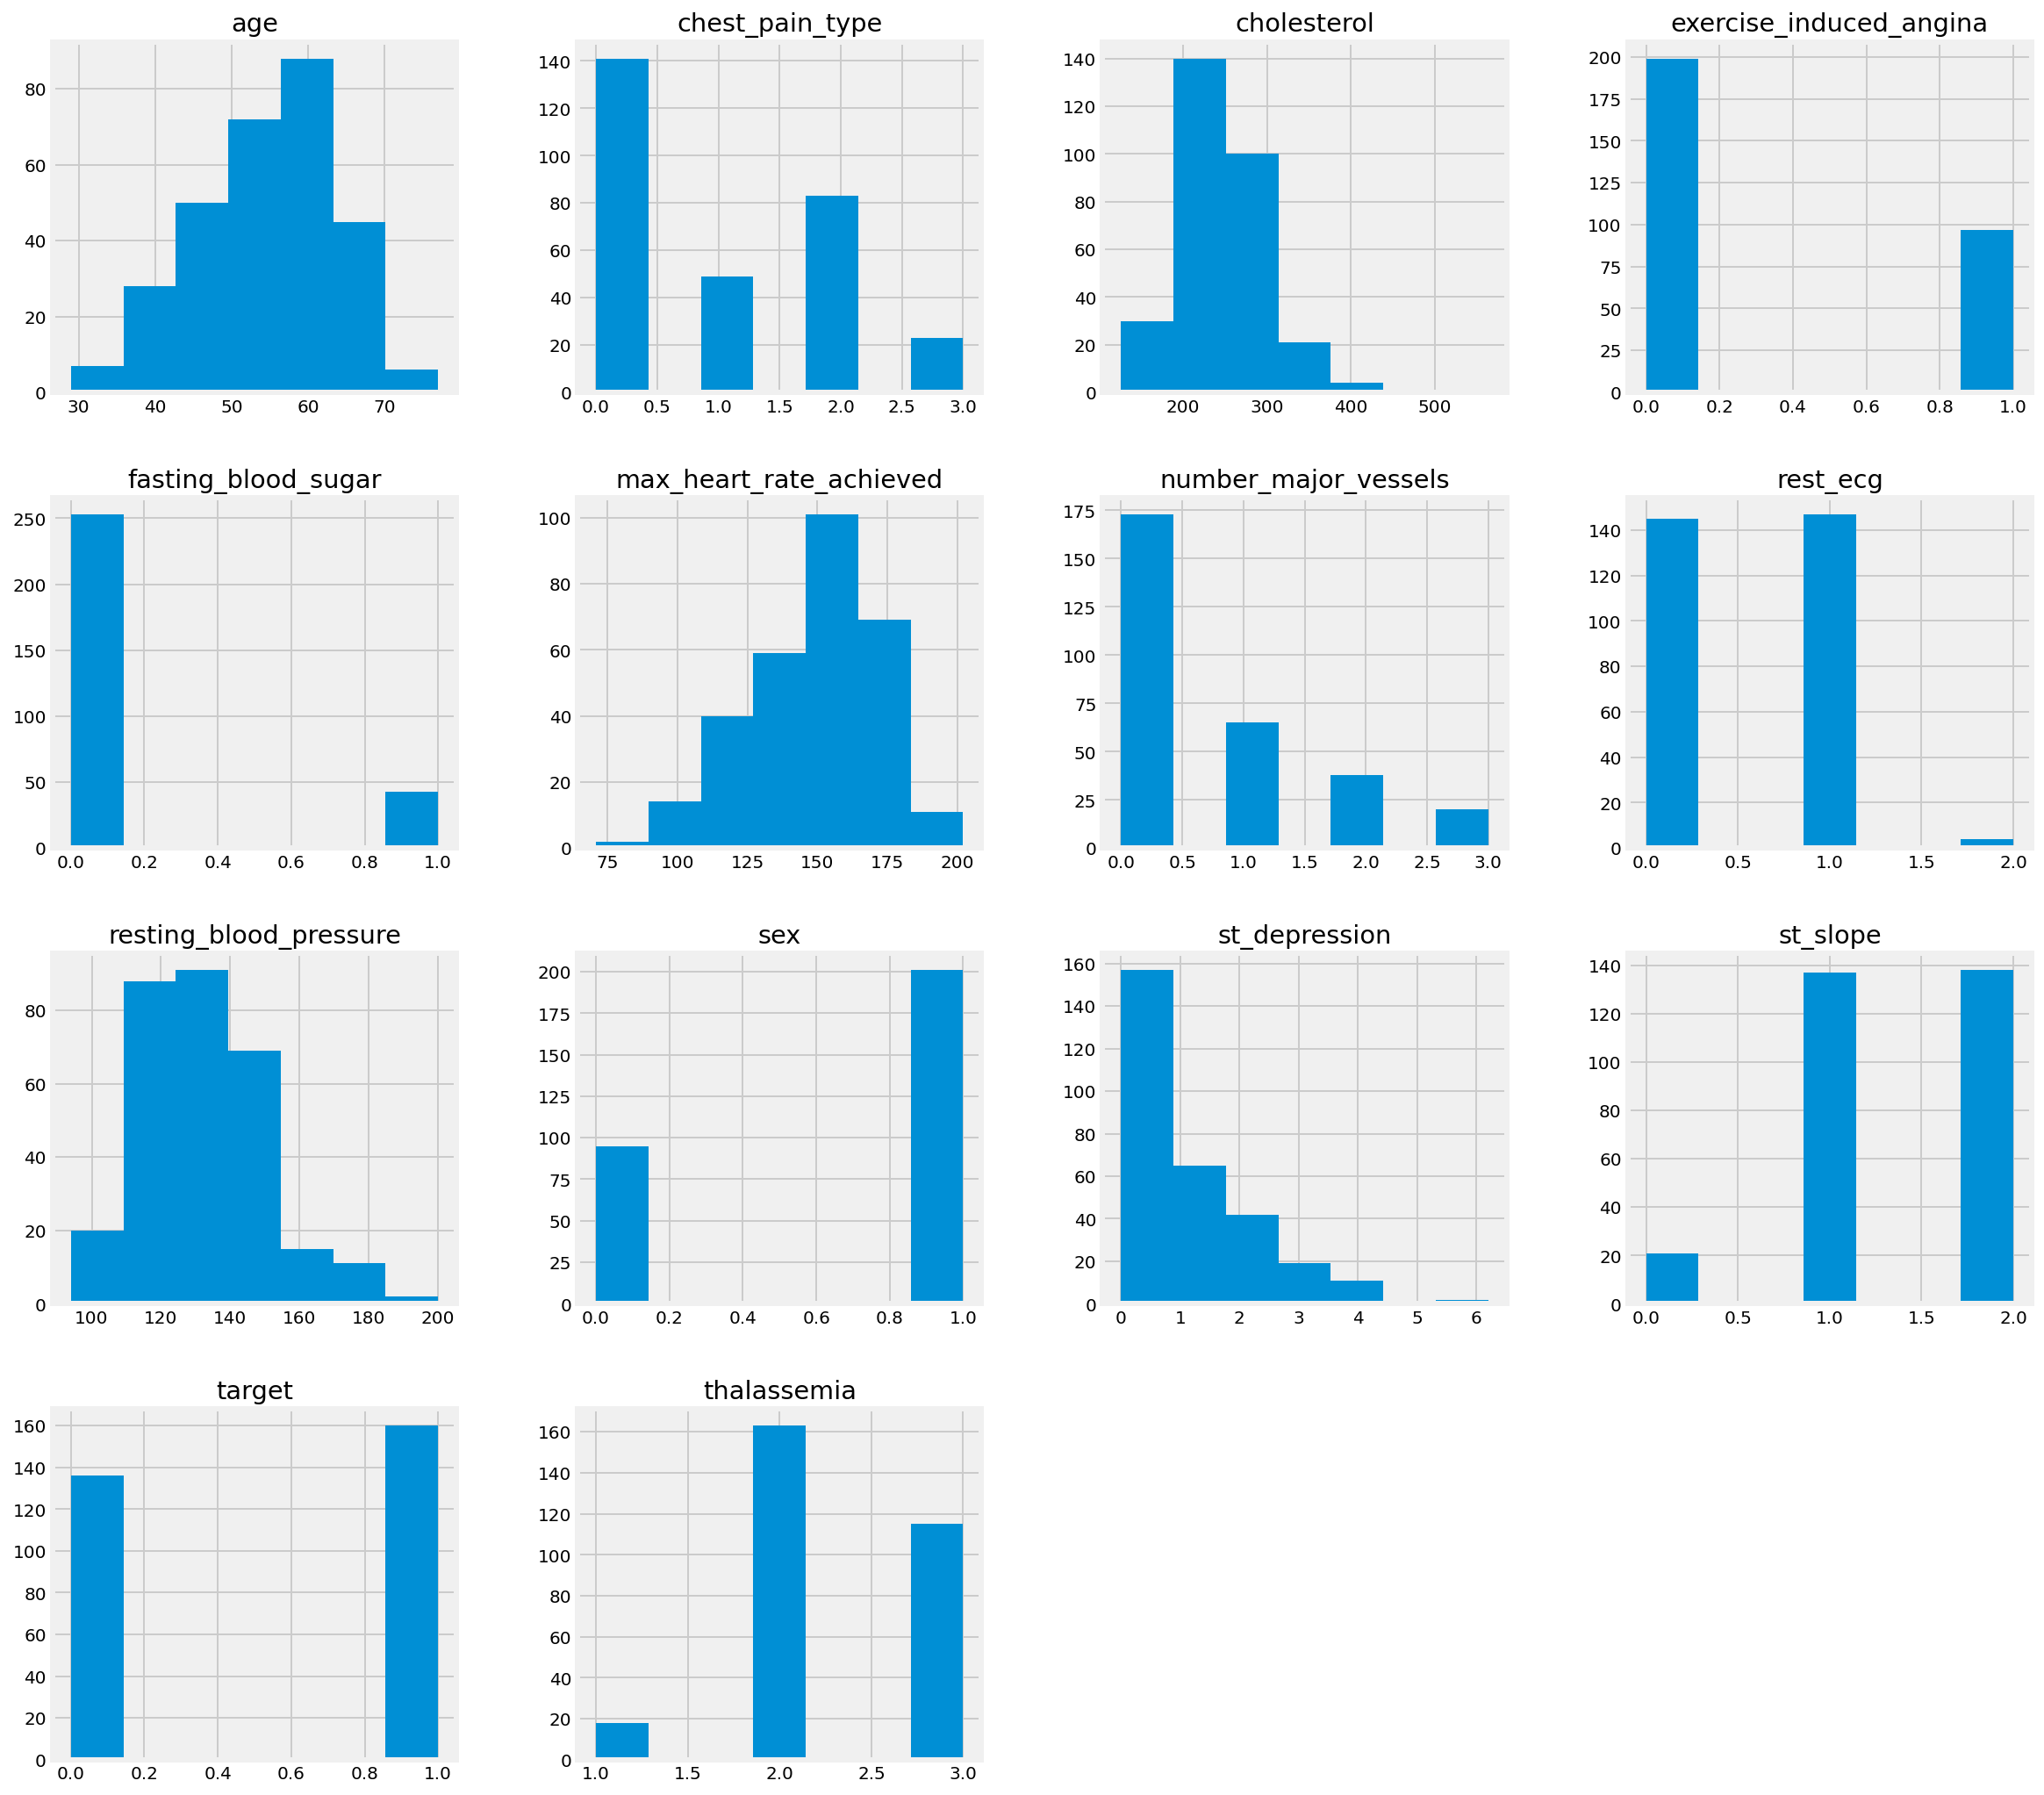

In [16]:
HD.hist(figsize=(18,18), bins=7);


2- Show the correlation matrix using heat map.

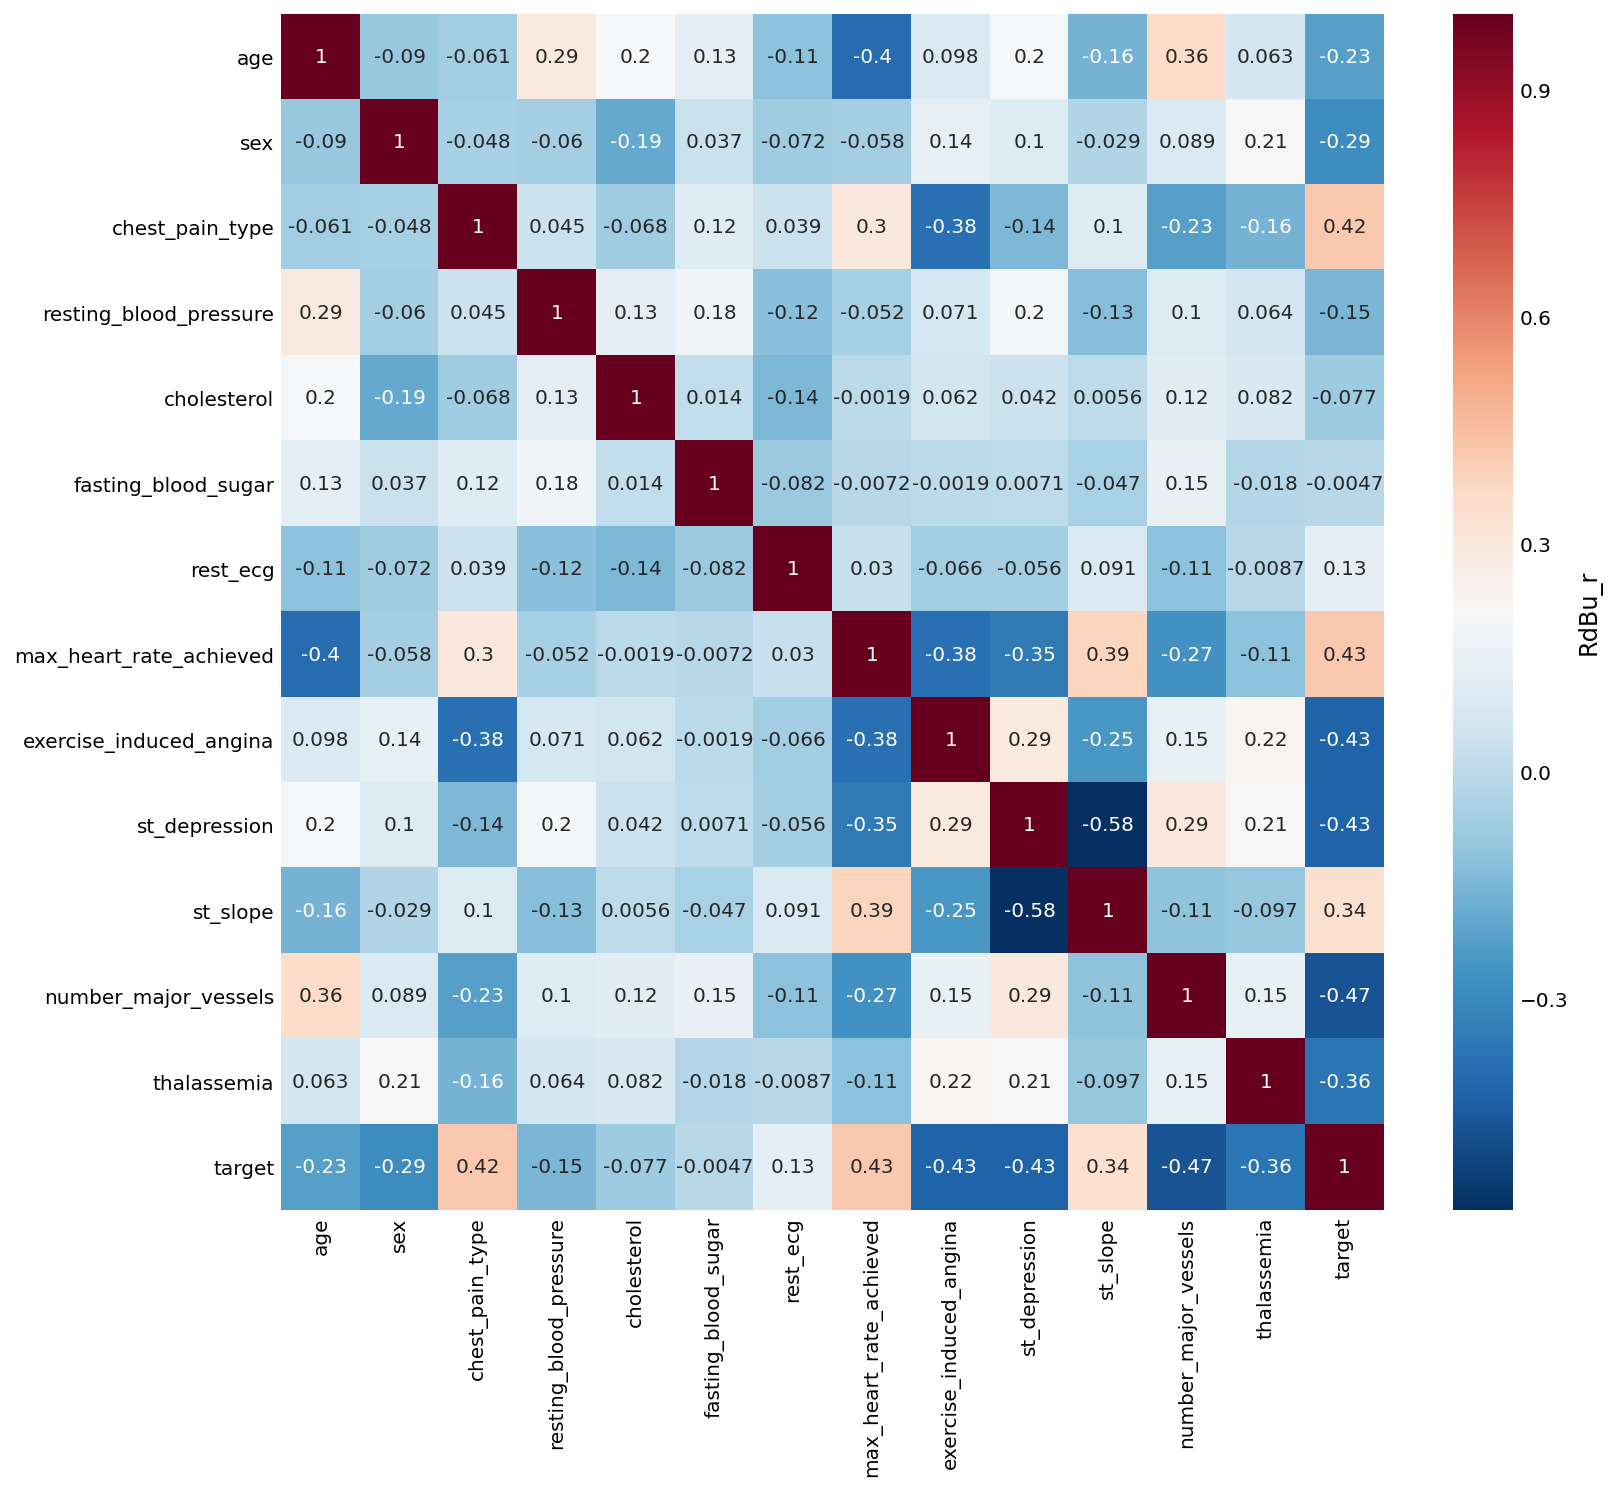

In [17]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(HD.corr(),cmap="RdBu_r",annot=True,ax=ax,cbar_kws={'label': 'RdBu_r'})
plt.show()

2- Show the pair plot for all data set with our target.

In [18]:
sns.pairplot(HD, hue = 'target', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

C:\Users\sony\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sony\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sony\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\sony\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sony\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Show the age rang for persons in our data set. 

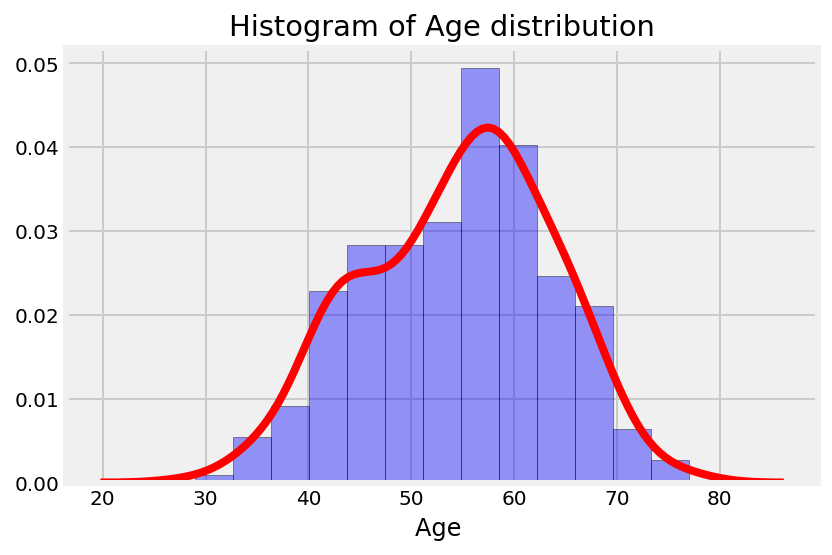

In [19]:
sns.distplot(HD['age'], color = 'red' , hist_kws={'edgecolor':'black', "color":'blue' });
plt.title('Histogram of Age distribution');
plt.xlabel('Age ');


Show how have heart disease wich age and gender.

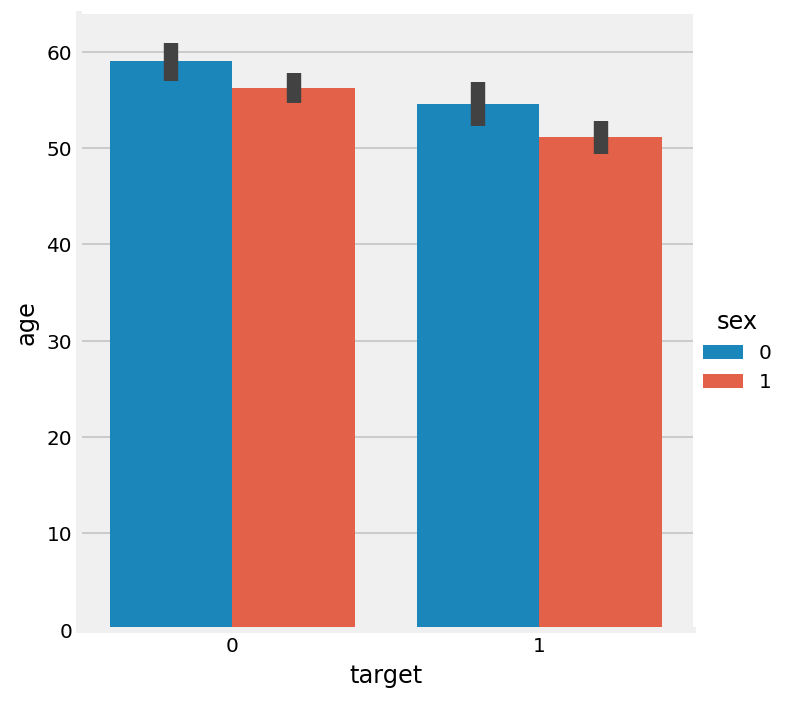

In [20]:
sns.catplot(x='target', y='age', hue='sex', data=HD, kind='bar');

Show the distribution of ages in our dataset and spcify the gender. 

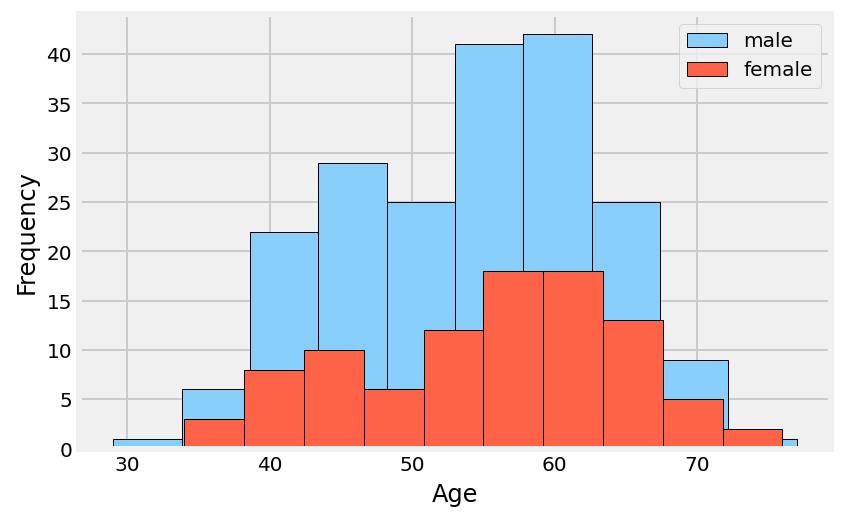

In [21]:
plt.hist(list(HD[HD['sex']==1]['age']), 
            ec = 'black', color='lightskyblue', label='male')
plt.hist(list(HD[HD['sex']==0]['age']), 
            ec = 'black' ,color="tomato", label='female')
plt.legend()
plt.ylabel('Frequency'), plt.xlabel('Age');

Show the ages distribution of males sex=0 and females sex=1 and how have heart disease target =1 and how havent heart disease target =0.

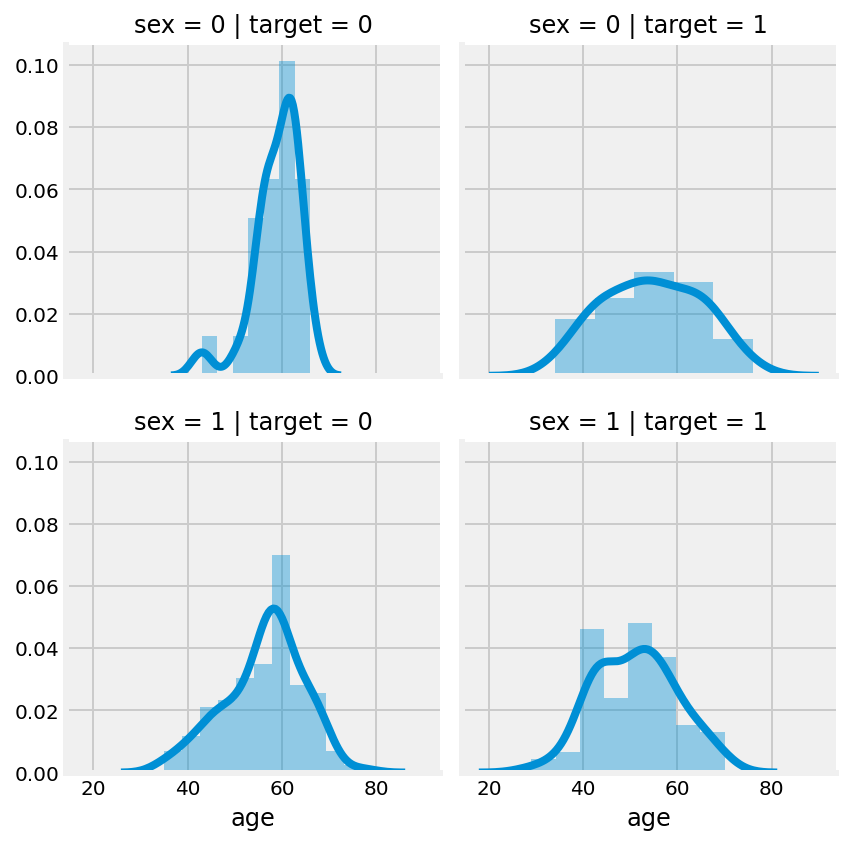

In [22]:
g = sns.FacetGrid(HD, row='sex', col='target')
g.map(sns.distplot, "age")
plt.show()


Show distribution of age with blood_pressure.

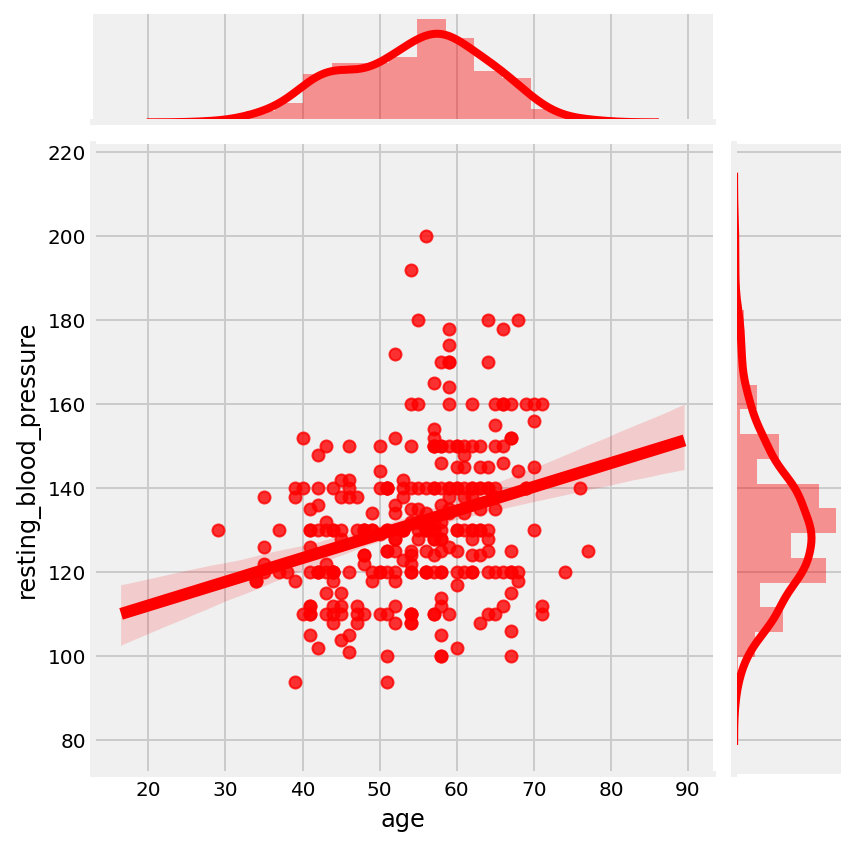

In [23]:
sns.jointplot(data=HD, x='age', y='resting_blood_pressure', kind='reg', color='r')
plt.show()

## Modeling: 
Splitting, Train and Test

Now using train_test_split to split our dataset into training and testing datasets. Then we will use Machine Learning models to train and test the data.

In [24]:
predictors = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'number_major_vessels', 'thalassemia']
x = HD[predictors]
y = HD.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)




Logistic Regression Classifier

In [25]:
#1-Logistic Regression
lr = LogisticRegression(solver='lbfgs')


lr.fit(x_train,y_train)

lg_score=lr.score(x_train,y_train)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [26]:
# model.predict
ly_pred = lr.predict(x_test)

In [27]:
print(classification_report(y_test, ly_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85        36
           1       0.83      0.92      0.88        38

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74



In [28]:
# Calculate accuracy_score
lg_acc=accuracy_score(y_test, ly_pred)
print(accuracy_score(y_test, ly_pred))


0.8648648648648649


In [29]:
print('Logistic Regression Classifier score for Heart Disease data set is') 
print(lg_score) 
print('With accuracy score equal to')
print(lg_acc)

Logistic Regression Classifier score for Heart Disease data set is
0.8873873873873874
With accuracy score equal to
0.8648648648648649


 
For K-Neighbors,Decision Tree and Random forest classification score varies based on different values of parameters that we choose. Thus,I will use grid search  to see the best parameters in our modeling.also I'll plot a score graph for different values of K neighbors and Decision Tree to check when do I achieve the best score.Then we will take the best parameters and apply it on our modeling.


K Neighbors Classifier

In [30]:
#K Neighbors Classifier first find the best parameters
print('Processing GridSearch. Please hold for the next available set of outputs.\n')

knn_dict = {'n_neighbors': [10, 12, 14, 15]}

kn = KNeighborsClassifier()
kn_model = GridSearchCV(kn, knn_dict)
kn_model.fit(x_train, y_train)

print("Best Parameters: {}".format(kn_model.best_params_))
print()
print("Best Score: {}".format(kn_model.best_score_))

Processing GridSearch. Please hold for the next available set of outputs.



C:\Users\sony\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters: {'n_neighbors': 10}

Best Score: 0.6621621621621622


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
kn_model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

The best number of neighbors to our dataset is 10 then we will apply it to our model 

In [32]:
# KNeighbors modeling with the best parameters for our data set
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
knn_model = knn.fit(x_train, y_train)

# Score our model
knn_score=knn_model.score(x_train, y_train)

print(knn_score)

y_pred_knn = knn_model.predict(x_test)

# compute classification accuracy
knn_acc=metrics.accuracy_score(y_test, y_pred_knn)
print(knn_acc)

0.7072072072072072
0.6081081081081081


In [33]:
 print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        36
           1       0.62      0.61      0.61        38

    accuracy                           0.61        74
   macro avg       0.61      0.61      0.61        74
weighted avg       0.61      0.61      0.61        74



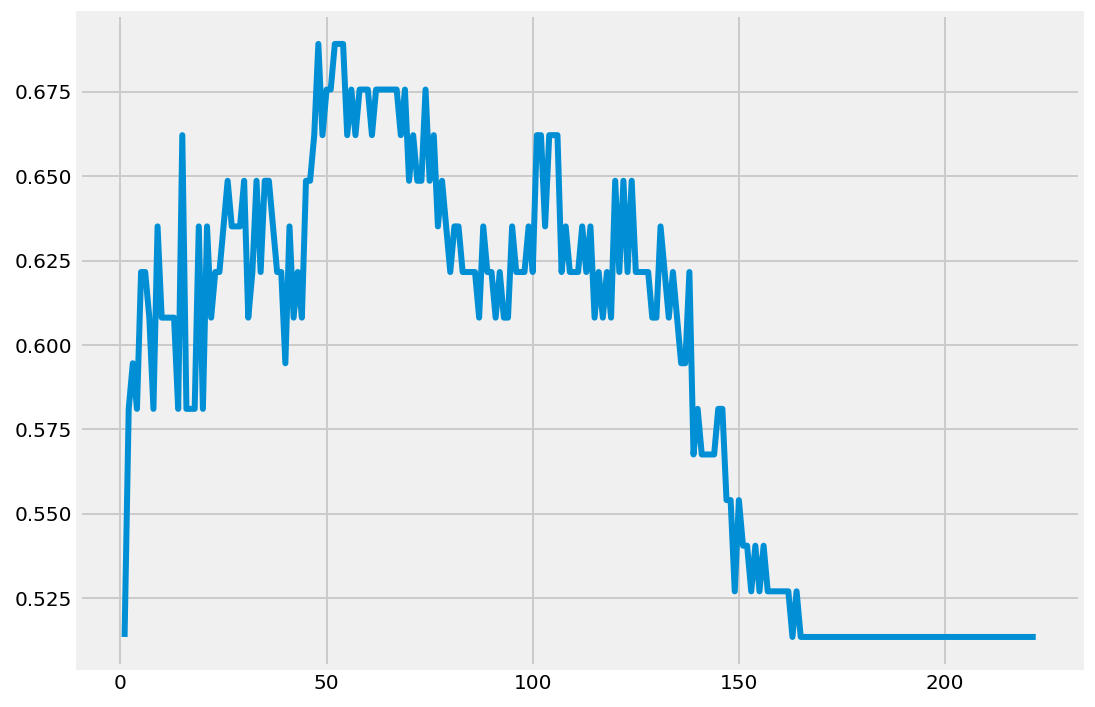

In [34]:
# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, x_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    test_acc.append(knn.score(x_test, y_test))
    
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, x_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

In [35]:
print('K-Neighbors Classifier score for Heart Disease data set is') 
print(knn_score)
print('with accuracy equal to')
print(knn_acc)

K-Neighbors Classifier score for Heart Disease data set is
0.7072072072072072
with accuracy equal to
0.6081081081081081


Decision Tree Classifier

In [36]:
# Decision Tree Classifier first find the best parameters
print('Processing GridSearch. Please hold for the next available set of outputs.\n')
params = {'max_depth': range(1,20),
          'max_leaf_nodes': list(range(2, 100)),
          'min_samples_split': [2, 3, 4]}


grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), params)
grid_search_dt.fit(x_train,y_train)


print("Best Parameters: {}".format(grid_search_dt.best_params_))
print()
print("Best Score: {}".format(grid_search_dt.best_score_))

Processing GridSearch. Please hold for the next available set of outputs.



C:\Users\sony\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters: {'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}

Best Score: 0.7702702702702703


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

The best number for TreeClassifier to our dataset is Best Parameters: {'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2} then we will apply it to our model .

In [38]:
# Decision Tree modeling with the best parameters for our data set

dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
dtc.fit(x_train, y_train)
dt_score=dtc.score(x_train, y_train)
print(dt_score)

y_pred_dt = dtc.predict(x_test)

# compute classification accuracy
dt_acc=metrics.accuracy_score(y_test, y_pred_dt)
print(dt_acc)

0.8198198198198198
0.7837837837837838


In [39]:
 print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        36
           1       0.78      0.82      0.79        38

    accuracy                           0.78        74
   macro avg       0.78      0.78      0.78        74
weighted avg       0.78      0.78      0.78        74



In [40]:
print(export_text(dtc, feature_names=list(x.columns),
                  show_weights=True))

|--- chest_pain_type <= 0.50
|   |--- number_major_vessels <= 0.50
|   |   |--- exercise_induced_angina <= 0.50
|   |   |   |--- weights: [6.00, 21.00] class: 1
|   |   |--- exercise_induced_angina >  0.50
|   |   |   |--- weights: [18.00, 4.00] class: 0
|   |--- number_major_vessels >  0.50
|   |   |--- weights: [49.00, 3.00] class: 0
|--- chest_pain_type >  0.50
|   |--- weights: [27.00, 94.00] class: 1



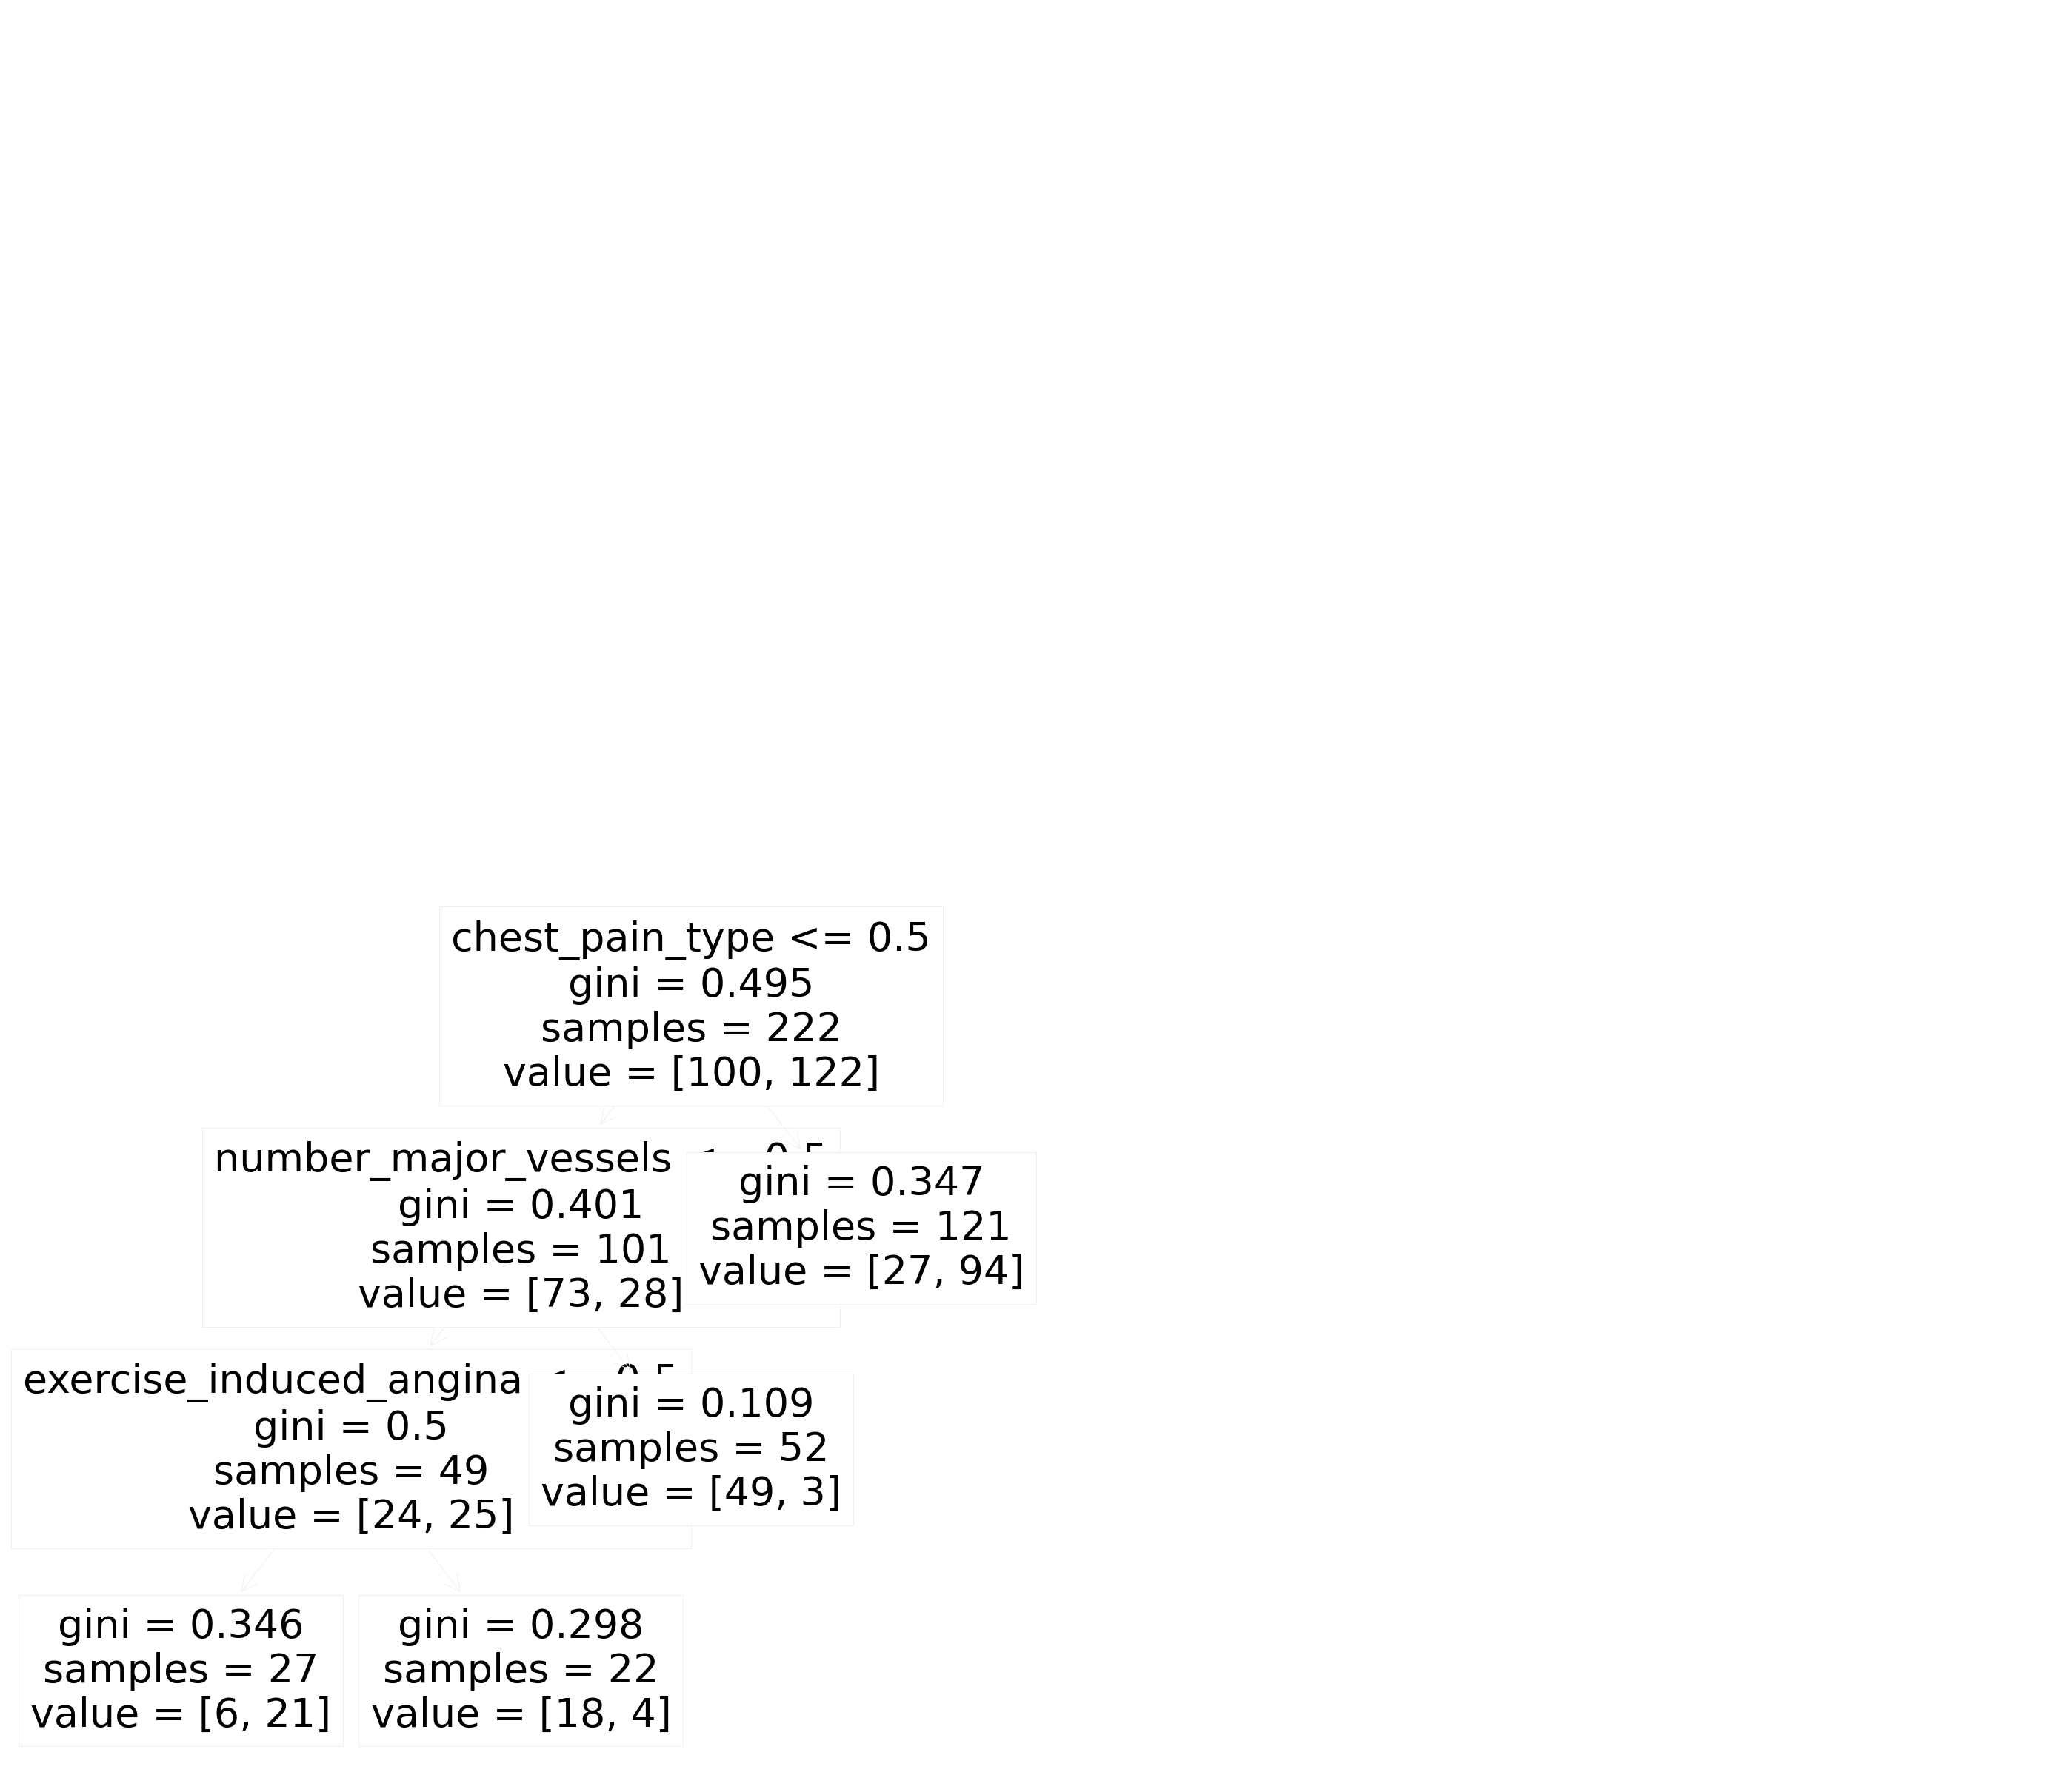

In [41]:
plt.figure(figsize=(22,22))
plot_tree(dtc, feature_names=x.columns);


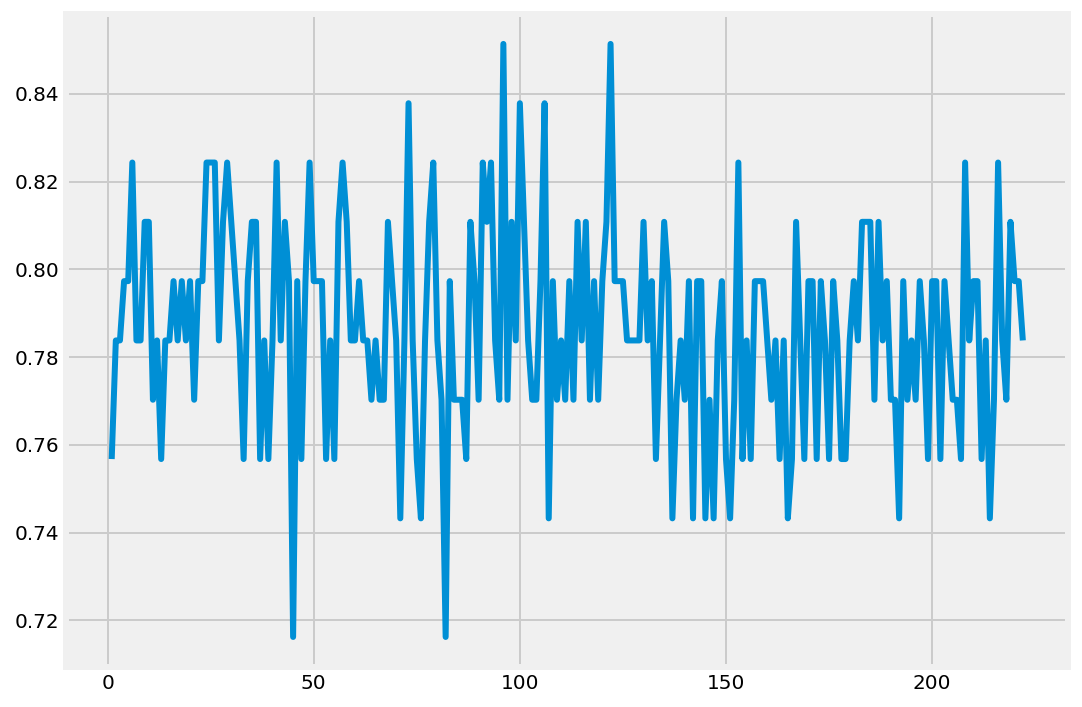

In [42]:
# plot test accuracy by number max depth:
test_acc = []
for i in range(1, x_train.shape[0]+1):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train, y_train)
    test_acc.append(dtc.score(x_test, y_test))
    

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, x_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

In [43]:
print('Decision Tree Classifier score for Heart Disease data set is') 
print(dt_score)
print('with accuracy equal to ')
print(dt_acc)

Decision Tree Classifier score for Heart Disease data set is
0.8198198198198198
with accuracy equal to 
0.7837837837837838


In [44]:
# define features importance to Decision Tree model

#print("Feature Importance scores for Decision Tree Classifier:", dtc.feature_importances_)

# Create a dataframe of the features and their respective importance scores
features_df = pd.DataFrame({'Features': x.columns, 
                            'Importance Score': dtc.feature_importances_})

# Sort the values by "Importance Score" with ascending in false to ensure
# the score appear from highest to lowest in the new dataframe
features_df.sort_values('Importance Score', inplace=True, ascending=False)
print('Features importance to Decision Tree model')
features_df

Features importance to Decision Tree model


Features  Importance Score
2           chest_pain_type          0.263709
11     number_major_vessels          0.115395
7   max_heart_rate_achieved          0.113316
3    resting_blood_pressure          0.106128
8   exercise_induced_angina          0.078346
4               cholesterol          0.077532
9             st_depression          0.075018
1                       sex          0.042934
0                       age          0.039743
6                  rest_ecg          0.038603
10                 st_slope          0.028306
12              thalassemia          0.020970
5       fasting_blood_sugar          0.000000

Random Forest Classifier

In [ ]:
# Random Forest Classifier first find the best parameters
print('Processing GridSearch. Please hold for the next available set of outputs.\n')
parameters = {"max_depth": [3,4,5,6,7,8,9,10,11,12,13],
              "min_samples_split" :[2,3,4,5,6],
              "n_estimators" : [10],
              "min_samples_leaf": [1,2,3,4,5],
              "criterion": ('gini','entropy')},

rf = RandomForestClassifier(random_state=1)
rfg_model = GridSearchCV(rf, parameters, n_jobs = -1, cv=10)
rfg_model.fit(x_train, y_train)

print("Best Parameters: {}".format(rfg_model.best_params_))
#print(gd_model.best_estimator_)
print()
print("Best Score: {}".format(rfg_model.best_score_))

Processing GridSearch. Please hold for the next available set of outputs.



In [ ]:
rfg_model.best_estimator_

In [ ]:
# Random Forest modeling with the best parameters for our data set

rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
# Fit your model on the features (X) and the target (y)
rf_model.fit(x_train, y_train)


In [ ]:
rf_score=rf_model.score(x_train,y_train)
print(rf_score)
y_pred_rf = rf_model.predict(x_test)

# compute classification accuracy
rf_acc=metrics.accuracy_score(y_test, y_pred_rf)
print(rf_acc)

In [ ]:
 print(classification_report(y_test, y_pred_rf))

In [ ]:
# define features importance to random forest model
features = x.columns

feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})

features_df.sort_values('Importance Score', inplace=True, ascending=False)
print('Features importance to random forest model')
features_df

In [ ]:
print('Random Forest Classifier score for Heart Disease data set is') 
print(rf_score)
print('with accuracy equal to ')
print(rf_acc)

Modeling summary 


1-Logistic Regression Classifier score for Heart Disease data set is 0.88 With accuracy score equal to 0.86

2-K-Neighbors Classifier with 10 Neighbors score for Heart Disease data set is
0.70 with accuracy equal to 0.60

3-Decision Tree Classifier score for Heart Disease data set is 0.81 with accuracy equal to 0.78

4- Random Forest Classifier score for Heart Disease data set is 0.87with accuracy equal to 0.79
